

# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.

Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

<a id='wrangling'></a>
# Data Wrangling

## Gather

Here i will gather the required data from the different sources. My different sources are:
APi, .csv, .tsv.  
- the csv is loaded through read_csv method
- the tsv is downloaded programmatically
- the api data is queried and saved

In [236]:
import pandas as pd
import numpy as np
import re
import requests
import tweepy
import tweepy.api as api
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%run 'authorization.py' #importing macros from python file

In [5]:
#load data form the csv
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [152]:
#downloading file programmatically
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image-predictions.tsv','wb') as file:
        file.write(response.content)

In [153]:
#load data form the tsv
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [154]:
#  twitter API authentication.
consumer_key = API_KEY 
consumer_secret = API_SECRET 
access_token = ACCESS_TOKEN
access_secret = ACCESS_TOKEN_SECRET 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [ ]:
#data extraction from twitter api using tweet id from twitter_archive table
fails_dict={}
            
lists =['666029285002620928','891815181378084864','892177421306343426']
start = timer()    
with open('tweet_json.txt', 'w') as outfile:
#     for tweet_id in twitter_archive.tweet_id[:100]:
    for tweet_id in twitter_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) #how to handle fails

In [ ]:
print(fails_dict) 

Some tweet queries have failed. There are only two errors which are recurring:
- TweepError([{'code': 144, 'message': 'No status found with that ID.'}]) :Corresponds with HTTP 404. The requested Tweet ID is not found (if it existed, it was probably deleted)
- TweepError([{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]) :Corresponds with HTTP 403. Thrown when a Tweet cannot be viewed by the authenticating user, usually due to the Tweet’s author having protected their Tweets.

In [155]:
#loading additional tweet info in a dict
count= 0
twitter_api = {}
twitter_api['tweet_id']=[]
twitter_api['retweet_count']=[]
twitter_api['favorite_count']=[]
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        j = json.loads(line)
        count+=1
#         print(str(count)+': ' +j['id_str'],j['retweet_count'],j['favorite_count'])
        twitter_api['tweet_id'].append(j['id_str'])
        twitter_api['retweet_count'].append(j['retweet_count'])
        twitter_api['favorite_count'].append(j['favorite_count'])


In [156]:
#converting dict to df
twitter_api_df = pd.DataFrame(twitter_api)

## Assess

In [157]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [158]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
640,793241302385262592,NaN,NaN,2016-11-01 00:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He's out here bustin h*ckin ghosts. 13/10 dedicated af https://t.co/Ap477GhwXt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793241302385262592/photo/1,13,10,Tucker,None,None,None,None
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When a single soap orb changes your entire perception of the universe... 10/10 https://t.co/9eCXpVExJc,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/738883359779196928/photo/1,https://twitter.com/dog_rates/status/738883359779196928/photo/1",10,10,None,None,None,None,None
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661657767936/photo/1,13,10,None,None,None,pupper,None
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Aiden. His eyes are magical. Loves his little Guy Fieri friend. Sneaky tongue slip. 11/10 would caress https://t.co/Ac37LOe3xD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384960745472/photo/1,11,10,Aiden,None,None,None,None
1289,708149363256774660,NaN,NaN,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jebberson. He's the reigning hide and seek world champion. 10/10 hasn't lost his touch https://t.co/VEFkvWCoHF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708149363256774660/photo/1,10,10,Jebberson,None,None,None,None


In [159]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [160]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [161]:
twitter_archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
               ... 
Shooter           1
Shelby            1
unacceptable      1
Harrison          1
Jazzy             1
Name: name, Length: 957, dtype: int64

In [162]:
twitter_archive_df.tweet_id.duplicated().any()

False

In [163]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [164]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [165]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [166]:
image_predictions_df.tweet_id.duplicated().any()

False

In [167]:
twitter_api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7532,35553
1,892177421306343426,5587,30751
2,891815181378084864,3702,23125
3,891689557279858688,7714,38855
4,891327558926688256,8316,37126
...,...,...,...
2326,666049248165822465,40,95
2327,666044226329800704,126,265
2328,666033412701032449,39,110
2329,666029285002620928,41,119


In [168]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   int64 
 2   favorite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [169]:
twitter_api_df.describe()

,retweet_count,favorite_count
count,2331.000000,2331.000000
mean,2648.198198,7429.762763
std,4478.608707,11538.132656
min,1.000000,0.000000
25%,537.000000,1292.000000
50%,1239.000000,3229.000000
75%,3074.500000,9096.000000
max,76087.000000,153457.000000


In [170]:
twitter_api_df.tweet_id.duplicated().any()

False

#### Quality Issues:
##### `twitter_archive_df` table
- Remove tweets that are replies or retweets
- Missing information (expanded_urls)
- Entry as `None` instead of NaN (dog stage variables, name)
- Erroneous datatypes (tweet_id)
- Incorrect value of rating denominator (must be always = 10, not 0 or 170)
- Invalid entries in name column ('a','the',etc.).
- Tweets not about dogs.

##### `image_predictions_df` table
- Erroneous datatypes (tweet_id)
- Algorithm outcome is present. #not solving this because doesn't make sense
- Inconsistency in font (p1,p2,p3)

##### `twitter_api_df` table


#### Tidiness Issues:
- One variable in four columns in `twitter_archive_df` table (doggo, floofer, puppo and pupper).
- `twitter_api_df` table should be a part of `twitter_archive_df` table.
- Single column to reflect dog ratings [rating_numerator/rating_denominator] in the `twitter_archive_df` table. 


- Given tweet_id in `twitter_archive_df` table duplicated in `twitter_api_df` and `image_predictions_df` tables
- date and time are mixed in the timestamp column.
- can combine columns in `image_predictions_df` table to show the outcome of the most confident algorithm.

## Clean

In [171]:
t_archive_clean = twitter_archive_df.copy()
t_api_clean = twitter_api_df.copy()
image_predictions_clean = image_predictions_df.copy()

### Missing Data

#### `twitter_archive_df`: Some expanded urls are missing. I don't think I will do any analysis with the expanded urls, so we can ignore it for now.

### Quality

#### Remove retweets and replies from the `twitter_archive_df` table

##### Define

Wherever the retweet id or reply param is populated remove that observation row.

##### Code

In [172]:
#get indexes with non null value of in_reply_to_status_id or/and retweeted_status_id
reply_tweets =t_archive_clean[t_archive_clean.in_reply_to_status_id.notna()].index.tolist()
retweeted_tweets =t_archive_clean[t_archive_clean.retweeted_status_id.notna()].index.tolist()

In [173]:
#drop non-original tweets
t_archive_clean.drop(reply_tweets, axis =0, inplace =True)
t_archive_clean.drop(retweeted_tweets, axis =0, inplace =True)

##### Test

In [174]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###### *The columns related to replies and retweets are not needed anymore as they only contain null values now.*

In [175]:
#drop the columns related to replies and retweets
columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
         'retweeted_status_timestamp']
t_archive_clean.drop(columns, axis =1, inplace =True)

In [176]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Entry 'None' instead of NaN in the `twitter_archive_df` table

##### Define

Set the None values to np.nan in all the 4 dog stage columns.

##### Code

In [177]:
# twitter_archive_df_clean = 
t_archive_clean.replace('None',np.nan, inplace =True)

##### Test

In [178]:
t_archive_clean.eq('None').any()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
dtype: bool

#### Erroneous datatype (tweet_id) in the `twitter_archive_df` table

##### Define

Convert the datatype of tweet_id column to string or object type instead of int, since no calculations are to 
be done on this numerical data.

##### Code

In [179]:
# twitter_archive_df_clean = 
t_archive_clean.tweet_id = t_archive_clean.tweet_id.astype(str)

##### Test

In [180]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


#### Incorrect value of rating denominator in the `twitter_archive_df` table

##### Define

The value of denominator should ideally be 10 but it is not in all observstions because some pictures contain more than 1 dog. To fix this find out the number of dogs in a pic and then divide numerator and denominator by that number.
We can temporarily combine image number, tweet id and rating denominator, numerator columns and do the calculation.

##### Code

In [181]:
#further inspection
pd.options.display.max_colwidth = 200
t_archive_clean.query('rating_denominator != 10')[['tweet_id','rating_denominator','rating_numerator','text']] 

# fix the denominators where you can and leave the rest out of analysis(remove)
# to fix manually read the text and input correct values using iloc with tweet_id
# b =a.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
# b

,tweet_id,rating_denominator,rating_numerator,text
433,820690176645140481,70,84,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,810984652412424192,7,24,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
902,758467244762497024,150,165,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,740373189193256964,11,9,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,731156023742988288,170,204,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,722974582966214656,20,4,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228,713900603437621249,90,99,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1274,709198395643068416,50,45,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"


The text contains the correct rating as there are some images in the tweet where there is more than one dog , so the ratings are inflated and can be corrected by dividing the numerator and denominator by the number of dogs.

In [182]:
t_archive_clean.loc[t_archive_clean.tweet_id == '820690176645140481', 'rating_numerator'] = 84/7

t_archive_clean.loc[t_archive_clean.tweet_id == '810984652412424192', 'rating_numerator'] = np.nan

t_archive_clean.loc[t_archive_clean.tweet_id == '758467244762497024', 'rating_numerator'] = 165/15

t_archive_clean.loc[t_archive_clean.tweet_id == '740373189193256964', 'rating_numerator'] = 14

t_archive_clean.loc[t_archive_clean.tweet_id == '731156023742988288', 'rating_numerator'] = 204/17

t_archive_clean.loc[t_archive_clean.tweet_id == '722974582966214656', 'rating_numerator'] = 13

t_archive_clean.loc[t_archive_clean.tweet_id == '716439118184652801', 'rating_numerator'] = 11

t_archive_clean.loc[t_archive_clean.tweet_id == '713900603437621249', 'rating_numerator'] = 99/9

t_archive_clean.loc[t_archive_clean.tweet_id == '710658690886586372', 'rating_numerator'] = 80/8

t_archive_clean.loc[t_archive_clean.tweet_id == '709198395643068416', 'rating_numerator'] = 45/5

t_archive_clean.loc[t_archive_clean.tweet_id == '704054845121142784', 'rating_numerator'] = 60/5

t_archive_clean.loc[t_archive_clean.tweet_id == '697463031882764288', 'rating_numerator'] = 44/4

t_archive_clean.loc[t_archive_clean.tweet_id == '684222868335505415', 'rating_numerator'] = 121/11

t_archive_clean.loc[t_archive_clean.tweet_id == '682962037429899265', 'rating_numerator'] = 10

t_archive_clean.loc[t_archive_clean.tweet_id == '677716515794329600', 'rating_numerator'] = 144/12

t_archive_clean.loc[t_archive_clean.tweet_id == '675853064436391936', 'rating_numerator'] = 88/8

t_archive_clean.loc[t_archive_clean.tweet_id == '666287406224695296', 'rating_numerator'] = 9


In [183]:
# t_archive_clean.rating_denominator.astype(int)
# t_archive_clean.info()

In [184]:
#setting all denominators as 10
t_archive_clean.rating_denominator = 10

##### Test

In [185]:
# t_archive_clean.query('rating_denominator != 10')[['tweet_id','rating_denominator','rating_numerator','text']] 

In [186]:
t_archive_clean.query('rating_denominator != 10').tweet_id.any()

False

#### Invalid entries in name column ('a','the',etc.). in the `twitter_archive_df` table

##### Define

Most of the names can be extracted from the text given. It requires some complex regex pattern and not all text columns contain dog name.

First find the rows with invalid names, then from the text extract their names.

##### Code

In [187]:
mask = t_archive_clean.name.str.islower().fillna(False)
column_name = 'name'
t_archive_clean.loc[mask, column_name] = np.nan

In [188]:
t_archive_clean[t_archive_clean.name.isna()].sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9.0,10,NaN,NaN,NaN,NaN,NaN
2138,670040295598354432,2015-11-27 00:43:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",😂😂😂 10/10 for the dog and the owner https://t.co/5iYF0Ci0EK,https://twitter.com/dog_rates/status/670040295598354432/photo/1,10.0,10,NaN,NaN,NaN,NaN,NaN
687,788039637453406209,2016-10-17 15:31:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Did... did they pick out that license plate? 12/10 for both https://t.co/lRmUUOxgbQ,"https://twitter.com/dog_rates/status/788039637453406209/photo/1,https://twitter.com/dog_rates/status/788039637453406209/photo/1",12.0,10,NaN,NaN,NaN,NaN,NaN
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10,NaN,NaN,NaN,NaN,NaN
2232,668221241640230912,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh,https://twitter.com/dog_rates/status/668221241640230912/photo/1,10.0,10,NaN,NaN,NaN,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,12.0,10,NaN,NaN,NaN,NaN,NaN
2340,666099513787052032,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8.0,10,NaN,NaN,NaN,NaN,NaN
1457,695095422348574720,2016-02-04 04:03:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib,https://twitter.com/dog_rates/status/695095422348574720/photo/1,12.0,10,NaN,NaN,NaN,pupper,NaN
1669,682429480204398592,2015-12-31 05:14:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I know we joke around on here, but this is getting really frustrating. We rate dogs. Not T-Rex. Thank you... 8/10 https://t.co/5aFw7SWyxU",https://twitter.com/dog_rates/status/682429480204398592/photo/1,8.0,10,NaN,NaN,NaN,NaN,NaN
1587,686749460672679938,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Strange pup here. Easily manipulated. Rather inbred. Sharp for a dog. Appears uncomfortable. 8/10 would still pet https://t.co/nSQrhwbk1V,https://twitter.com/dog_rates/status/686749460672679938/photo/1,8.0,10,NaN,NaN,NaN,NaN,NaN


In [189]:
t_archive_clean[t_archive_clean.name.isna()].count()

tweet_id              707
timestamp             707
source                707
text                  707
expanded_urls         704
rating_numerator      707
rating_denominator    707
name                    0
doggo                  41
floofer                 5
pupper                105
puppo                   8
dtype: int64

In [190]:
dog_name=[]
name=''

for ind in t_archive_clean[t_archive_clean.name.isna()].index:
    text = t_archive_clean['text'][ind]
    n= re.search('[Tt]his is\s([A-Z]\w+)',text) or re.search('[Hh]is name is\s([A-Z]\w+)',text) or re.search('[Tt]his is .+ named ([A-Z]\w+)',text) 
#     or re.search('[Tt]hat is ([A-Z]\w+)', text) # only one dog name extracted
#     print(t_archive_clean['name'][ind], t_archive_clean['text'][ind])
    if n:
        print(n.group(1))
        t_archive_clean['name'][ind] = n.group(1)    

Howard
Blue
Bretagne
Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Leroi
Berta
Chuk
Alfonso
Cheryl
Jessiga
Klint
Big
Kohl
Daryl
Pepe
Octaviath
Johm


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [191]:
# the twwet ids listed in this cell can be cleaned manually
t =t_archive_clean[t_archive_clean.tweet_id == '668142349051129856'].text
t.str.extract('[Tt]his is .+ named ([A-Z]\w+)',expand=True)
# (r'^[Tt]his name is\s(.+)',t)
t
# 675706639471788032
# 826204788643753985
# 669037058363662336
# 668142349051129856
# 758041019896193024

# 670303360680108032
# 675706639471788032

2237    This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2
Name: text, dtype: object

##### Test

In [192]:
t_archive_clean[t_archive_clean.name.isna()].count()

tweet_id              682
timestamp             682
source                682
text                  682
expanded_urls         679
rating_numerator      682
rating_denominator    682
name                    0
doggo                  41
floofer                 5
pupper                105
puppo                   8
dtype: int64

#### Tweets not about dogs in the `twitter_archive_df` table

##### Define

There tweets were the picture posted are not of dogs and proof of this is can be found in the tweet text. These tweets can be misleading as they have valid ratings and can lead to incorrect analysis. Using re.search() on the tweet text the tweets which are not about dogs can be found and removed. The tweet text not about dogs are such:
- please stop sending in pics of...
- It is not a dog.
- Please only send in dogs. 
- we only rate dogs

##### Code

In [193]:
#list of text to match to.
ignorelist=['[Nn]ot a [Dd]og', '[Pp]lease only send in [Dd]ogs','[Ww]e (only)? [Rr]ate [Dd]ogs' , 'stop sending (in)? (pics of)?']
finallist=[]
for ind in t_archive_clean.index:
    text = t_archive_clean['text'][ind]
    if any([re.search(r, text) for r in ignorelist]):
        finallist.append(ind)
#     print(t_archive_clean['name'][ind], t_archive_clean['text'][ind])
#     if n:
#         print(n.group(1))
#         t_archive_clean['name'][ind] = n.group(1)   
len(finallist)

61

In [194]:
#delete the tweets which do not concern dogs.
t_archive_clean.drop(finallist, inplace=True)
t_archive_clean.reset_index(drop=True, inplace=True)

##### Test

In [195]:
# t_archive_clean[t_archive_clean.name.isna()].count()
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   doggo               83 non-null     object 
 9   floofer             10 non-null     object 
 10  pupper              230 non-null    object 
 11  puppo               24 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 191.0+ KB


#### Erroneous datatypes (tweet_id) in the `image_predictions_df` table

##### Define

Convert the datatype of tweet_id column to string or object type instead of int, since no calculations are to be done on this numerical data.

##### Code

In [196]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)

##### Test

In [197]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Inconsistency in font (p1,p2,p3) in the `image_predictions_df` table

##### Define

There is no consistency in the font of the dog breed determined by different algorithms (in some cases the outcome is not a dog breed). This can be fixed by first replacing underscore by space and then calling method title() on the string.

##### Code

In [198]:
#replace '_' by space (' ') in the dataframe
image_predictions_clean.replace('_',' ',regex=True, inplace=True)

In [199]:
#capitalize text in columns p1,p2,p3
image_predictions_clean.p1=image_predictions_clean.p1.str.title()
image_predictions_clean.p2=image_predictions_clean.p2.str.title()
image_predictions_clean.p3=image_predictions_clean.p3.str.title()

##### Test

In [200]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American Staffordshire Terrier,0.914978,True,Staffordshire Bullterrier,0.084395,True,Boxer,0.000462,True
1005,709042156699303936,https://pbs.twimg.com/media/CdcGBB3WwAAGBuU.jpg,1,Hotdog,0.826579,False,Rottweiler,0.068179,True,Labrador Retriever,0.049218,True
367,672964561327235073,https://pbs.twimg.com/media/CVbZsouWUAIsxMc.jpg,1,Chihuahua,0.292343,True,Pug,0.173364,True,French Bulldog,0.045507,True
685,683857920510050305,https://pbs.twimg.com/media/CX2NJmRWYAAxz 5.jpg,1,Bluetick,0.174738,True,Shetland Sheepdog,0.126101,True,Beagle,0.122887,True
1891,849051919805034497,https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg,1,Fountain,0.997509,False,American Black Bear,0.001413,False,Sundial,0.000681,False


### Tidiness

#### One variable in four columns in `twitter_archive_df` table (doggo, floofer, puppo and pupper)

##### Define

Concatenate all 4 dog stage columns into a single column 'dog_stage'. This way we can preserve multiple dog stage values in a given row. Then remove the 4 dog stage variable columns.

##### Code

In [201]:
#concatenating contents of the columns: doggo, puppo, pupper, floofer, while ignoring NaN
t_archive_clean['dog_stage']=t_archive_clean[['doggo', 'pupper', 'puppo','floofer']].apply(lambda x:','.join(x.dropna().values.tolist()), axis=1)

In [202]:
#replace null string in dog_stage column with NaN
t_archive_clean.dog_stage.replace('',np.nan, inplace =True)

In [203]:
#delete the columns doggo, puppo, pupper, floofer
t_archive_clean.drop(['doggo', 'puppo', 'pupper', 'floofer'],axis=1,inplace=True)

##### Test

In [204]:
# t_archive_clean.eq('').any()

In [205]:
#different categories of dog stage variable
t_archive_clean.dog_stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [206]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   dog_stage           336 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 143.3+ KB


#### `twitter_api_df` table should be a part of `twitter_archive_df` table

##### Define

Merge the *twitter_api_df* column to the `twitter_archive_df` table, joining on *tweet_id*.

##### Code

In [207]:
t_archive_clean = pd.merge(t_archive_clean, t_api_clean,
                            on=['tweet_id'], how='left')

##### Test

In [208]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2035
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   object 
 1   timestamp           2036 non-null   object 
 2   source              2036 non-null   object 
 3   text                2036 non-null   object 
 4   expanded_urls       2033 non-null   object 
 5   rating_numerator    2035 non-null   float64
 6   rating_denominator  2036 non-null   int64  
 7   name                1414 non-null   object 
 8   dog_stage           336 non-null    object 
 9   retweet_count       2030 non-null   float64
 10  favorite_count      2030 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 190.9+ KB


#### Given tweet_id in `twitter_archive_df` table duplicated in `twitter_api_df` and `image_predictions_df` tables

##### Define

twitter_api_df table is no longer needed so ignore that part. Isolate the tweet_id in the `patients` table, then convert these names to lower case to join with `treatments`. Then drop the given name and surname columns in the treatments table (so these being lowercase isn't an issue anymore).

##### Code

In [209]:
# id_names = patients_clean[['patient_id', 'given_name', 'surname']]
# id_names.given_name = id_names.given_name.str.lower()
# id_names.surname = id_names.surname.str.lower()
# treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
# treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

##### Test

In [210]:
# Confirm the merge was executed correctly
# treatments_clean

In [211]:
# Patient ID should be the only duplicate column
# all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
# all_columns[all_columns.duplicated()]

#### Single column to reflect dog ratings [rating_numerator/rating_denominator] in the twitter_archive_df table.

##### Define

The actual rating for dog is achieved by dividing the column 'rating_numerator' by 'rating_denominator'. So, we can create a column 'rating' by dividing numerator and denominator and later drop these two columns (rating_numerator, rating_denominator).

##### Code

In [212]:
#create column rating
t_archive_clean['rating'] = t_archive_clean['rating_numerator']/ t_archive_clean['rating_denominator']

In [213]:
#delete columns rating_numerator and rating_denominator
t_archive_clean.drop(columns=['rating_numerator','rating_denominator'], inplace=True)

##### Test

In [214]:
t_archive_clean.sample(6)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,rating
208,840268004936019968,2017-03-10 18:27:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Monty. He makes instantly regrettable decisions. Couldn't help himself. It looked like a ghost lollipop. 12/10 mistake happen https://t.co/8Wsr6b4RjE,"https://twitter.com/dog_rates/status/840268004936019968/photo/1,https://twitter.com/dog_rates/status/840268004936019968/photo/1,https://twitter.com/dog_rates/status/840268004936019968/photo/1,http...",Monty,NaN,5583.0,18896.0,1.2
880,728653952833728512,2016-05-06 18:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Coleman. Somebody needs to tell him that he's sitting in chairs wrong. 8/10 https://t.co/O10zjJ2Ixs,"https://twitter.com/dog_rates/status/728653952833728512/photo/1,https://twitter.com/dog_rates/status/728653952833728512/photo/1,https://twitter.com/dog_rates/status/728653952833728512/photo/1",Coleman,NaN,1010.0,3228.0,0.8
507,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,Logan,NaN,6129.0,18234.0,7.5
1797,670442337873600512,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp,https://twitter.com/dog_rates/status/670442337873600512/photo/1,Koda,NaN,187.0,607.0,1.1
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,7532.0,35553.0,1.3
1929,667878741721415682,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,Tedrick,NaN,110.0,371.0,0.2


<a id='eda'></a>
# Exploratory Data Analysis

I will pose some questions -- minimum three and then I will evaluate the data to find the answers.

- what is common among the most popular dogs? (breed, name, etc.)
- what is common among least popular dogs?
- see how, breed, name of dog, dog stage, etc. effects its rating. 
- what factors go into fetching a dog high ratings.
- are highly rated dogs most retweeted or liked?

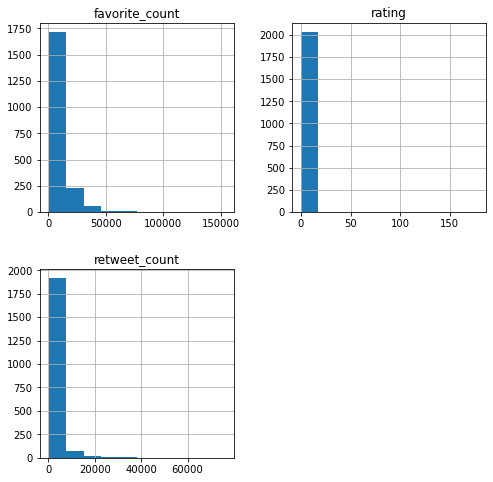

In [215]:
t_archive_clean.hist(figsize=(8, 8));

In [240]:
t_archive_clean.describe()

,retweet_count,favorite_count,rating
count,2030.000000,2030.000000,2035.000000
mean,2421.813300,8018.179803,1.173268
std,4288.988117,11759.962271,4.025323
min,11.000000,69.000000,0.000000
25%,538.000000,1739.750000,1.000000
50%,1174.000000,3627.500000,1.100000
75%,2775.000000,10050.750000,1.200000
max,76087.000000,153457.000000,177.600000


In [224]:
#mask where dog_stage is not nan
#mask for patients who showed up, i.e. no_show == "No"
present = t_archive_clean.dog_stage != np.nan
#mask for patients who did not show up, i.e. no_show == "Yes"
# absent=df.no_show == 0

## Q1: Does dog stage effect its rating?

In [ ]:
t_archive_clean.dog_stage.value_counts()

In [232]:
dog_stage_analysis = t_archive_clean.groupby('dog_stage').rating.mean()
dog_stage_analysis

dog_stage
doggo            1.184722
doggo,floofer    1.100000
doggo,pupper     1.111111
doggo,puppo      1.300000
floofer          1.188889
pupper           1.080543
puppo            1.200000
Name: rating, dtype: float64

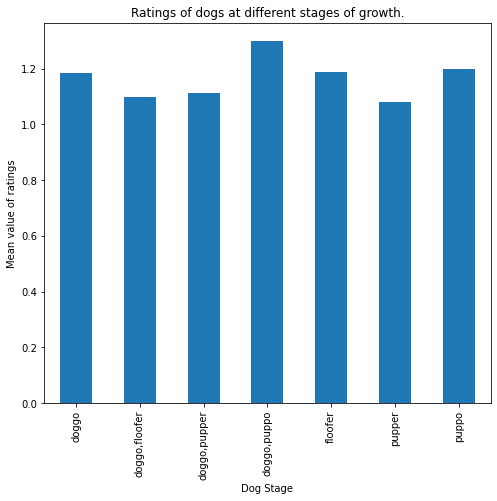

In [254]:
dog_stage_analysis.plot(kind = 'bar', figsize=(8,7));
plt.title('Ratings of dogs at different stages of growth.')
plt.xlabel('Dog Stage');
plt.ylabel('Mean value of ratings');

puppo fetches the highest ratings while as pupper gets least rating.

## Q2: Are highly rated dogs most liked or retweeted?

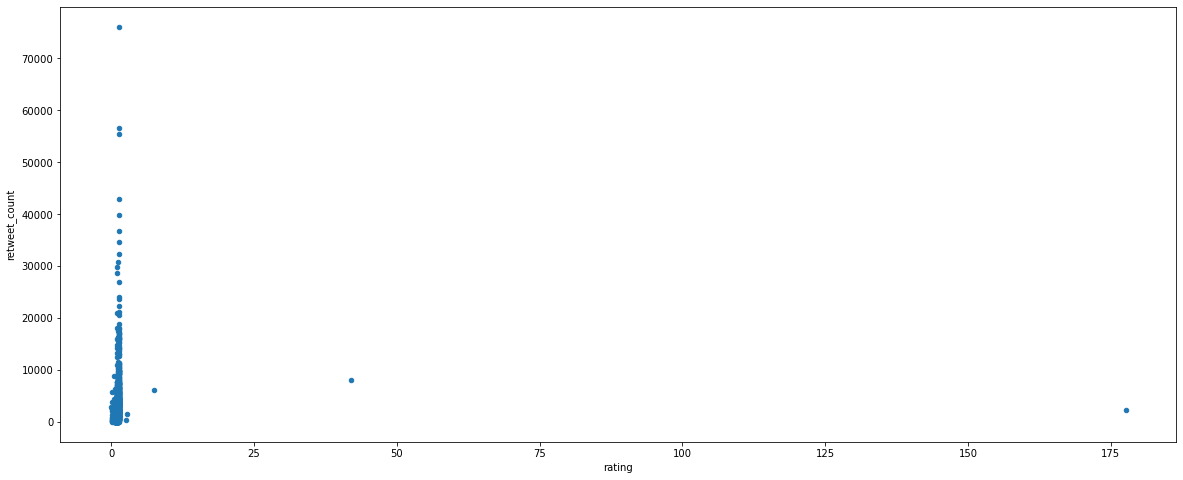

In [298]:
#plot the retweet count of the dogs along with their rating.
#plot the ratings on x axis and the retweet count on the y axis.
t_archive_clean.plot(x="rating", y="retweet_count",kind ='scatter',figsize=(20,8));

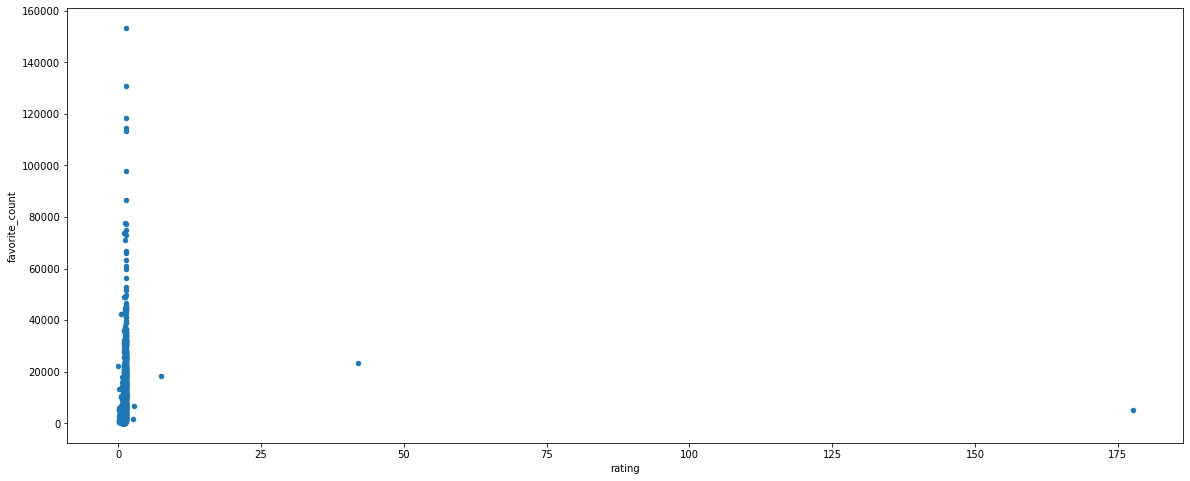

In [299]:
t_archive_clean.plot(x="rating", y="favorite_count",kind ='scatter',figsize=(20,8));

highly rated dogs are not the most liked tweets or retweeted ones. we have no clear positive or negative relationship between highly rated and most liked dogs. 
Bar chart indicates a slightly skewed but kind of normal distribution.

## Q3: Traits of highly rated dogs?

In [314]:
#find the traits of 75 percentile rating dogs. rating > 1.2
# check breed and names of dogs 

## Q4: Relationship between highly rated and most retweeted dogs?

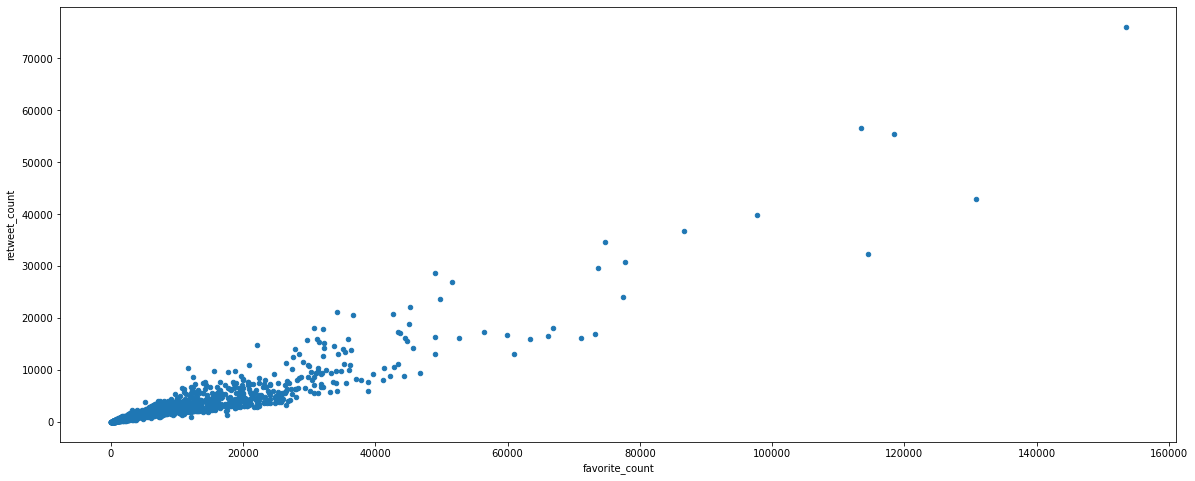

In [315]:
t_archive_clean.plot(x="favorite_count", y="retweet_count", kind ='scatter', figsize=(20,8));
#apply regression here.

right skewed but mostly a normal distribution.

## Q4: Difference between highly rated and most liked dogs?

In [316]:
#find traits of most liked dogs and then compare with traits of highly rated dogs.

In [306]:
#favorite_count > 10050.75
# t_archive_clean.query('favorite_count > 10050.75').groupby('dog_stage').count()
liked= t_archive_clean.query('favorite_count > 10050.75')

In [307]:
# t_archive_clean.query('rating > 1.2').groupby('dog_stage').count()
rated = t_archive_clean.query('rating > 1.2')

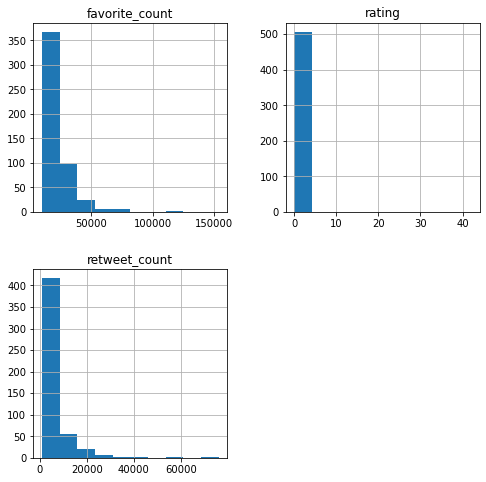

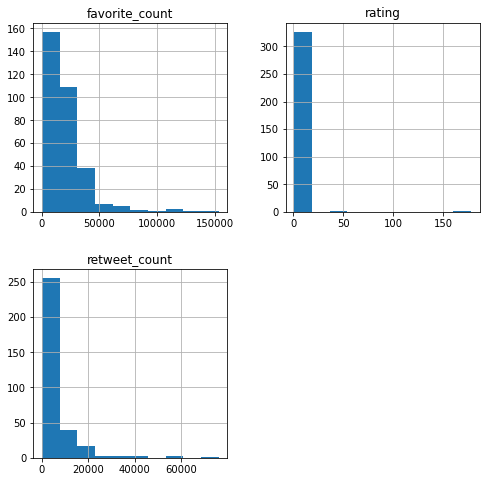

In [302]:
a.hist(figsize=(8, 8));b.hist(figsize=(8, 8));

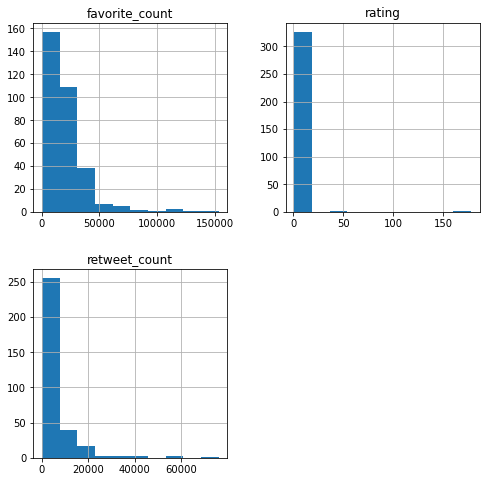

In [313]:
liked.groupby('dog_stage').count()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,rating
dog_stage,,,,,,,,,
doggo,38,38,38,38,38,22,38,38,38
"doggo,floofer",1,1,1,1,1,0,1,1,1
"doggo,pupper",2,2,2,2,2,1,2,2,2
"doggo,puppo",1,1,1,1,1,0,1,1,1
floofer,3,3,3,3,3,2,3,3,3
pupper,38,38,38,38,38,23,38,38,38
puppo,14,14,14,14,14,9,14,14,14


In [311]:
rated.groupby('dog_stage').count()

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,rating
dog_stage,,,,,,,,,
doggo,28,28,28,28,28,15,27,27,28
"doggo,pupper",1,1,1,1,1,1,1,1,1
"doggo,puppo",1,1,1,1,1,0,1,1,1
floofer,3,3,3,3,3,1,3,3,3
pupper,26,26,26,26,26,10,26,26,26
puppo,10,10,10,10,10,5,10,10,10
